# Python: Initial data prep section.  Read, clean and create sets.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              470 non-null    object 
 1   Open              470 non-null    float64
 2   High              470 non-null    float64
 3   Low               470 non-null    float64
 4   Close             470 non-null    float64
 5   Adj Close         470 non-null    float64
 6   Volume            470 non-null    float64
 7   fluctuation rate  470 non-null    float64
 8   RSI               457 non-null    float64
dtypes: float64(8), object(1)
memory usage: 33.2+ KB
None
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'fluctuation rate', 'RSI'],
      dtype='object')
               Open          High           Low         Close     Adj Close  \
count    470.000000    470.000000    470.000000    470.000000    470.000000   
mean   15060.411341  16119.469740  1

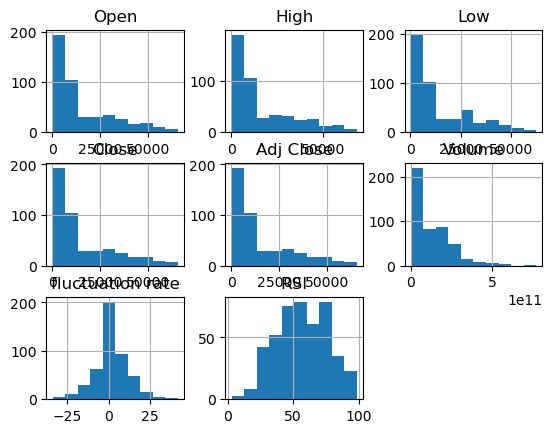

In [1]:
import pandas as pd
dataset=pd.read_csv('BTC-USD.csv')
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi
dataset['RSI'] = calculate_rsi(dataset)
print(dataset.info())
print(dataset.keys())
print(dataset.describe())
print(dataset.hist())
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset, test_size=0.2, random_state=42)

#### description:
According to my dataset, there is no null value so, I do not need to clear the data set. and except the "DATE" there is no value which is not number.

## Markdown: Pick an initial set of features for X and the target feature y.  Explain why you made these choices.  (Note, A target that is continuous can be made discrete by creating buckets that hold a range of values. For example: If you have a feature time_of_day that ranges from 0 to 23:59, you can create 24 buckets for each of the hour intervals, 0 to 0:59, 1 to 1:59, etc.)

My target variable, y, will represent the price. However, when looking at my dataset, I see various features that indicate prices, such as 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'fluctuation rate'. Since I want to explain price increases with my data and model, 'High' will be my target feature. Additionally, 'Volume' will be my predictor variable, x.

## Python: Do a decision tree on  X and y.  Compute metrics.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
X=train_set[['Volume']]
y=train_set['High']
X_test=test_set[['Volume']]
y_test=test_set['High']
tree=DecisionTreeRegressor(random_state=42)
tree.fit(X,y)
y_train_pred=tree.predict(X)
y_test_pred=tree.predict(X_test)
r2=tree.score(X,y_train_pred)
mse=mean_squared_error(y,y_train_pred)
r2_test=tree.score(X_test,y_test_pred)
mse_test=mean_squared_error(y_test,y_test_pred)
print(r2,mse,r2_test,mse_test)

1.0 28237608.853999097 1.0 179664678.10349232


## Markdown: Comment on the results.

The R2 value of 1.0 for the training set indicates that the trained model perfectly fits the training data, meaning it can explain all the variability in the training data.<br>
The Mean Squared Error (MSE) of 28237608.853999097 for the training set represents the average squared difference between the actual and predicted values.<br>
The R2 value of 1.0 for the test set indicates that the model also perfectly fits the test data, demonstrating its ability to generalize well to unseen data.<br>
However, the relatively high MSE of 179664678.10349232 for the test set suggests that the model's predictions have larger errors when applied to new, unseen data. This could indicate that the model is overfitting the training data and may not generalize well to new data.<br>

Overall, while the model performs exceptionally well on the training and test data in terms of fitting the data, the high MSE for the test set suggests that there might be room for improvement, particularly in terms of generalization to unseen data.<br>

## Python: See if you can do better using SVM or some other multi-classifier.

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
svm = SVR()
svm.fit(X, y)
y_pred_svm = svm.predict(X)
y_test_pred_svm = svm.predict(X_test)
r2_train_svm = svm.score(X, y_pred_svm)
mse_train_svm = mean_squared_error(y, y_pred_svm)
r2_test_svm = svm.score(X_test, y_test_pred_svm)
mse_test_svm = mean_squared_error(y_test, y_test_pred_svm)
print(r2_train_svm,mse_train_svm,r2_test_svm,mse_test_svm)
print(svm.support_) 
print(svm.support_vectors_) 
print(svm.n_support_) 

1.0 367634501.22843015 1.0 255988430.89353034
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 

### result:
The R2 value of 1 obtained for both the training and test sets indicates that the model can perfectly explain the variability of the data. However, the MSE values of 367634501.22843015 for the training set and 255988430.89353034 for the test set imply that the model has significant prediction errors when predicting the test data.

## Python: Do a final evaluation with the test set.

In [22]:
print("The R score and MSE of test set from decision tree: ",r2_test,mse_test)
print("The R score and MSE of test set from SVM: ",r2_test_svm,mse_test_svm)

The R score and MSE of test set from decision tree:  1.0 179664678.10349232
The R score and MSE of test set from SVM:  1.0 255988430.89353034


### Evaluation:
* Both the decision tree and SVM models achieved a perfect R-score of 1.0 on the test set. This indicates that these models perfectly explain the variance of the target variable. However, both models have relatively high mean squared error (MSE) values. The decision tree has an MSE of approximately 179,664,678, and the SVM has an MSE of approximately 255,988,431.<br>
* While the model has high explanatory power (indicated by the significantly high R-score), it may not have high prediction accuracy for individual instances (high MSE values).

## Markdown: Look at the parameters you found and discuss what you have learned.

* I used Volume and High as parameters because I wanted to explain the volatility of High using Volume. 
* In decision tree regression, I obtained a high r value of 1.0, indicating good explanatory power, but a very high MSE value of 179,664,678. This indicates that although the model explains well, significant errors occur when applying predictions. Similarly, I observed the same phenomenon in SVR. Despite obtaining a high r value of 1.0, the MSE was approximately 255,988,431, indicating even higher errors. This suggests that the SVR model has larger errors in predictions compared to the DT model.
* Through this, I learned that while an r score of 1.0 is very positive, obtaining a high MSE indicates that the model may have significant errors in predictions. This could imply that although the model explains the training data well, it may not generalize well to unseen data.